In [15]:
%load_ext autoreload
%autoreload 2

import sys 
sys.path.append('/global/project/projectdirs/desi/mocks/bgs/MXXL/one_percent')
import footprint 
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
import mxxl_real
from astropy.table import Table
from corr_func_tools import calc_wtheta,create_axes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


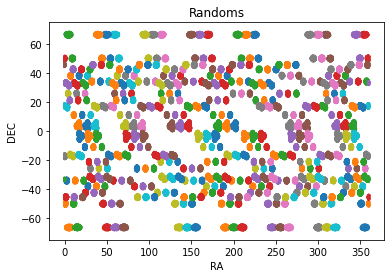

In [16]:
#make randoms 

version =2 
Ngal=1000000

if version==2:
    tiles_file = "/project/projectdirs/desi/mocks/bgs/MXXL/one_percent/tiles/v2/tiles-sv3.ecsv"
    Nmock = 36
elif version==1:
    tiles_file = "/project/projectdirs/desi/mocks/bgs/MXXL/one_percent/tiles/v1/onepercent.fits"
    Nmock = 96

# generate random galaxy ra, dec, then find galaxies in footprint                                                                             
#Ngal = 1000000                                                                                                                               
ra = np.random.rand(Ngal) * 360
sin_dec = np.random.rand(Ngal) * 2 - 1
dec = np.arcsin(sin_dec) * 180/np.pi

for i in range(Nmock):
    in_footprint = footprint.in_onepercent_footprint(ra, dec, tiles_file, nmock=i, version=version)

    plt.scatter(ra[in_footprint], dec[in_footprint], s=10, edgecolor="None")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('Randoms')

In [18]:
version =2 
Ngal=1000000

if version==2:
    tiles_file = "/project/projectdirs/desi/mocks/bgs/MXXL/one_percent/tiles/v2/tiles-sv3.ecsv"
    Nmock = 36
elif version==1:
    tiles_file = "/project/projectdirs/desi/mocks/bgs/MXXL/one_percent/tiles/v1/onepercent.fits"
    Nmock = 96

# generate random galaxy ra, dec, then find galaxies in footprint                                                                             
#Ngal = 1000000                                                                                                                               
ra = np.random.rand(Ngal) * 360
sin_dec = np.random.rand(Ngal) * 2 - 1
dec = np.arcsin(sin_dec) * 180/np.pi

ra_array = []
dec_array = []
nmock_array = []

count = int(1)
for i in range(Nmock):
    in_footprint = footprint.in_onepercent_footprint(ra, dec, tiles_file, nmock=i, version=version)
    ra_array.append(ra[in_footprint])
    dec_array.append(dec[in_footprint])
    nmock_array.append([count]*len(ra[in_footprint]))
    count +=1
    
ra_array = np.array(ra_array)
dec_array = np.array(dec_array)
nmock_array = np.array(nmock_array)


ra_array = np.concatenate(ra_array)
dec_array = np.concatenate(dec_array)
nmock_array = np.concatenate(nmock_array)

Table(np.c_[ra_array, dec_array,nmock_array], names=['RA', 'DEC','NMOCK'],dtype=[np.float64,np.float64,np.int32])

<ipython-input-18-2c05964b47c5>:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ra_array = np.array(ra_array)
<ipython-input-18-2c05964b47c5>:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dec_array = np.array(dec_array)
<ipython-input-18-2c05964b47c5>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nmock_array = np.array(nmock_

RA,DEC,NMOCK
float64,float64,int32
247.6345133158813,22.140252083112237,1
272.0869388233271,45.976393182973624,1
191.58845706625394,36.65103868990464,1
163.71386581330003,17.04339586491919,1
165.05084127898013,18.695332185389194,1
272.4147829280213,46.013601358014874,1
135.26787944164602,25.56086233839917,1
246.60527366418168,20.29606540987787,1
164.6953826778332,16.843319271597817,1


In [ ]:
for i in range(37):
    mxxl_temp=mxxl[(mxxl['NMOCK']==i)]
    plt.scatter(mxxl_temp['RA'][:1000000], mxxl_temp['DEC'][:1000000],s=10, edgecolor="None")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('MXXL')

In [15]:
mxxl = mxxl_real.read_mxxl_real()

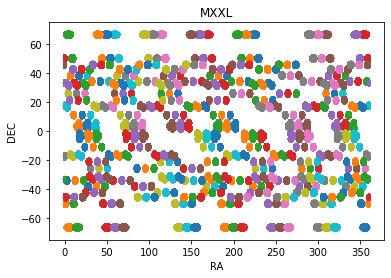

In [26]:
for i in range(36):
    mxxl_temp=mxxl[(mxxl['NMOCK']==i)]
    plt.scatter(mxxl_temp['RA'][:1000000], mxxl_temp['DEC'][:1000000],s=10, edgecolor="None")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('MXXL')

In [2]:
mxxl = mxxl_real.read_mxxl_real()

In [3]:
rand = mxxl_real.read_mxxl_real_rand()

/global/homes/l/lbigwood/S4Mock/mxxl_real.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ra_array = np.array(ra_array)
/global/homes/l/lbigwood/S4Mock/mxxl_real.py:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dec_array = np.array(dec_array)
/global/homes/l/lbigwood/S4Mock/mxxl_real.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the 

In [12]:
mxxl

RA,DEC,Z,r,NMOCK
float32,float32,float32,float32,int32
16.016405,-23.862709,0.77873105,20.549618,-1
9.943691,-44.839226,0.7861295,20.33258,34
88.79133,-21.36195,0.77366954,20.501741,-1
62.20571,-58.36512,0.7677795,20.53485,-1
21.76103,-49.25507,0.77738357,20.483452,-1
84.036125,-19.812656,0.7774608,20.572165,-1
30.471869,-52.489944,0.7604745,20.478935,-1
6.3888535,-65.56051,0.71885437,20.557486,31
52.64176,-53.020912,0.73893315,20.33798,-1


In [13]:
rand

RA,DEC,NMOCK
float64,float64,int32
199.1068327744453,3.5270743332075267,1
168.96275732017804,15.195089900578372,1
167.52139099405576,16.083648714408874,1
273.17078836860446,44.951568757219036,1
275.0221439670827,45.67924414652605,1
246.14889943341683,19.49853269071568,1
228.41821570364408,66.84825438247549,1
218.637061984309,35.29700930595589,1
224.1097210441343,65.83682156478676,1


In [6]:
w = []
for i in range(1,37):
    mxxl_n = mxxl[(mxxl['NMOCK']==i)]
    rand_n = rand[(rand['NMOCK']==i)]
    w.append(calc_wtheta(mxxl_n,rand_n))
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


ValueError: min() arg is an empty sequence

In [11]:
x = []
for j in range(len(w[0])):
    count = 0
    for i in range(len(w)):
        count += w[i][j]
    x.append(count/len(w))
x

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 2.3132851380682724,
 nan,
 2.1901785115837833,
 2.0751469945694754,
 2.090855085699577,
 2.059325832847169,
 2.0565453768914597,
 2.0461747557311885,
 2.0281675232648126,
 2.0263562863742592,
 2.020707239494337,
 2.0149730360101534,
 2.011425525379882,
 2.008480911452881,
 2.005312965244033,
 2.0006299513540555,
 1.9931151746247069,
 1.9700854571327266,
 1.854299210932084,
 1.3453023424247708,
 -3.521601823194794,
 -3.1297029456811742]

No handles with labels found to put in legend.


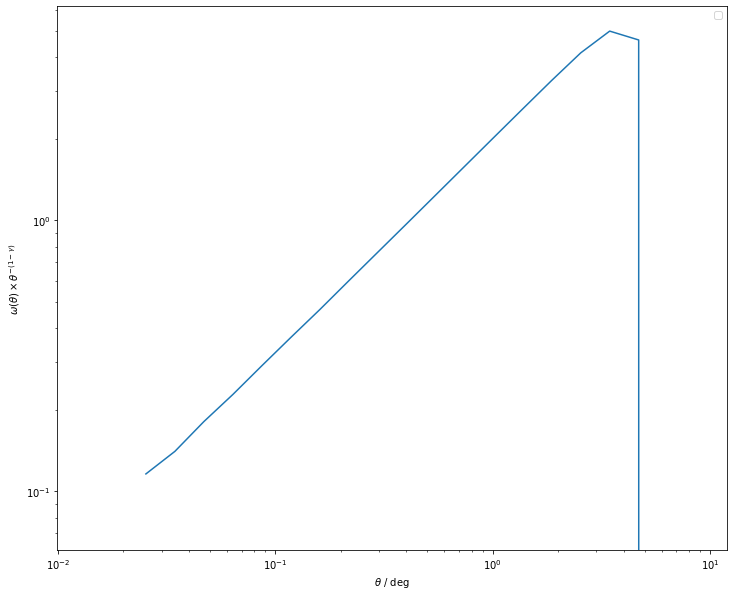

In [12]:
plt.figure(figsize=(12,10))
y,z=create_axes(x)
plt.plot(y,z)
plt.xlabel(r'$\theta$ / deg')
plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xscale('log')
plt.yscale('log')
plt.legend()

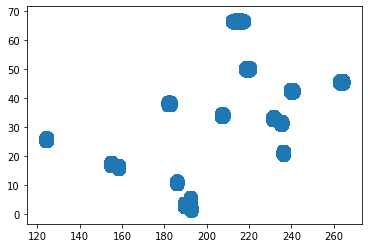

In [20]:
plt.scatter(mxxl['RA'][(mxxl['NMOCK']==1)],mxxl['DEC'][(mxxl['NMOCK']==1)])

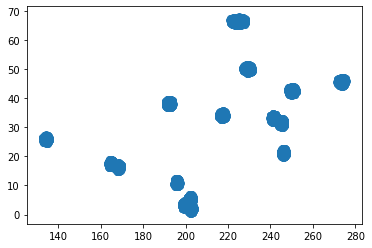

In [21]:
plt.scatter(rand['RA'][(rand['NMOCK']==1)],rand['DEC'][(rand['NMOCK']==1)])